In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

In [2]:
x,y = make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.8,random_state=11)

y = y.reshape((-1, 1))

print(x.shape, y.shape)

(400, 1) (400, 1)


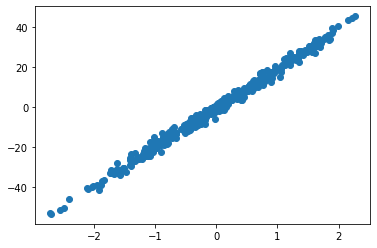

In [3]:
x = (x - x.mean())/x.std()

plt.figure()
plt.scatter(x, y)
plt.show()

In [4]:
ones = np.ones((x.shape[0], 1))

x_ = np.hstack((ones, x))
print(x_.shape)
print(x_[:5, :])

(400, 2)
[[ 1.         -0.86881353]
 [ 1.          1.04796658]
 [ 1.         -0.2019676 ]
 [ 1.         -0.34017061]
 [ 1.          0.13317349]]


In [5]:
def predict(x, theta):
    return np.dot(x, theta)

#Closed Form Formula:

$\theta = (X^T.X)^{-1}.X^T.Y$

This formula is good for small datasets because for large datasets finding inverse will take time and to implement this f whole datasets needs to be in memory so if you have less memory this method cannot be implemented.

In [6]:
def closedFormSolution(x, y):

    firstPart = np.dot(x.T, x)
    secondPart = np.dot(x.T, y)
    theta = np.dot(np.linalg.pinv(firstPart), secondPart)

    return theta

In [7]:
theta = closedFormSolution(x_, y)
print(theta)

[[-0.29187892]
 [19.45877082]]


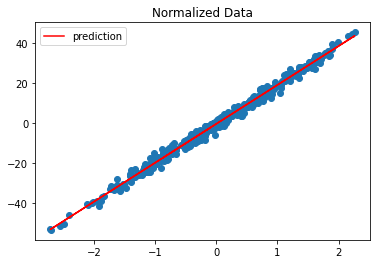

In [8]:
plt.figure()
plt.scatter(x, y)
plt.plot(x, predict(x_,theta), color='red', label="prediction")
plt.title("Normalized Data")
plt.legend()
plt.show()